# *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** ***   MERISKILL INTERNSHIP  *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** ***


##PROJECT# 03  :- "HR-Employee-Attrition"

Tasks to perform:
Data Cleaning:
Deleting redundant columns.
Renaming the columns.
Dropping duplicates.
Cleaning individual columns.
Remove the NaN values from the dataset
Check for some more Transformations
Data Visualization:
->       Plot a correlation map for all numeric variables
->       Overtime
->       Marital Status
->       Job Role
->       Gender
->       Education Field
->       Department
->       Business Travel
->       Relation between Overtime and Age
->       Total Working Years
->       Education Level
->       Number of Companies Worked
->       Distance from Home


#IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# DATA LOADING

In [2]:
df = pd.read_csv('/content/HR-Employee-Attrition.csv')
df.shape


(1470, 35)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
# View the first few rows of the data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# Summary statistics of the data
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#DATA CLEANING


In [6]:
# Delete redundant columns.
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
df.shape


(1470, 31)

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [8]:
# Check for duplicated values
df.duplicated().sum()

0

In [9]:
# Handling Missing Values
df.isnull().sum() # Check for missing values in each column

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

#PREICT EMPLOYEE ATTRITION

##SPLIT

In [10]:
X = df[['YearsAtCompany', 'Age', 'MonthlyIncome']] # Input features
y = df['Attrition'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##TRAIN LR MODEL


In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

##MAKE PREDICATIONS ON TEST SET


In [12]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8673469387755102


#DATA VISUALIZATION


##CORRELATION MAP FOR ALL NUMERICAL VARIABLES


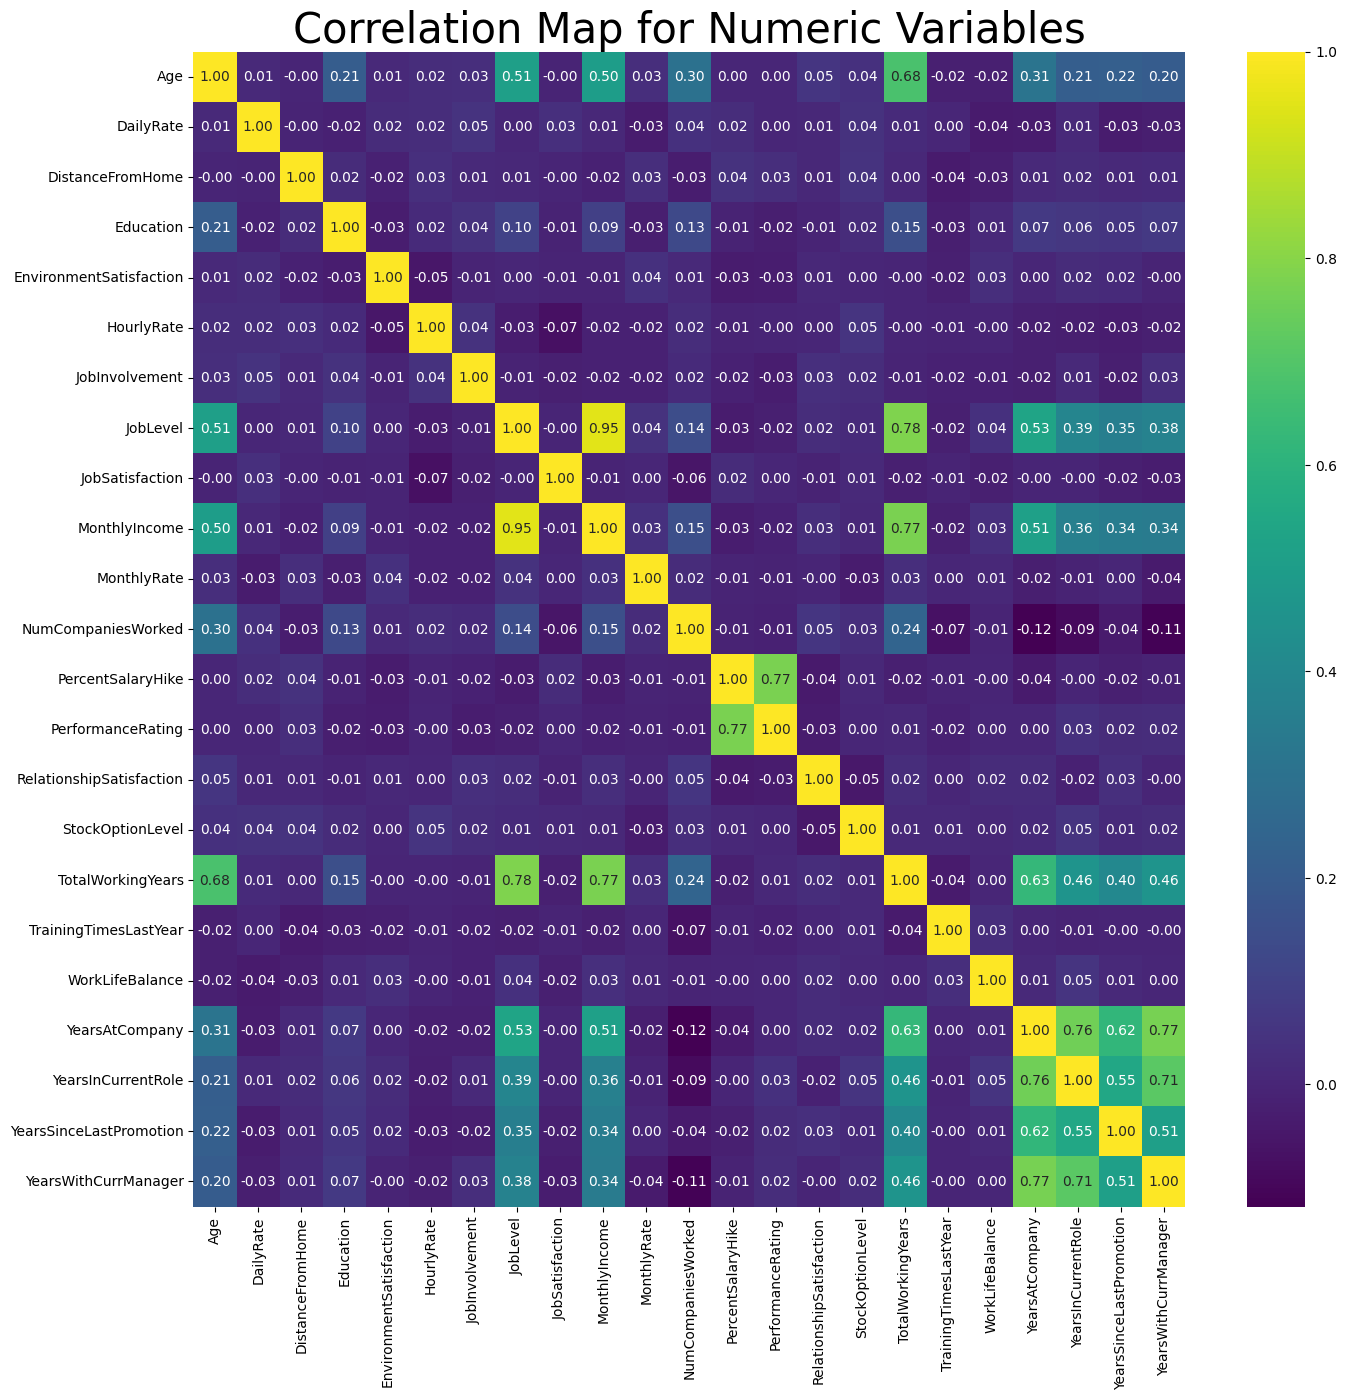

In [13]:
# Create correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot heatmap of `correlation` using the 'viridis' colormap
plt.figure(figsize=(16, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Map for Numeric Variables', fontsize=30)
plt.show()


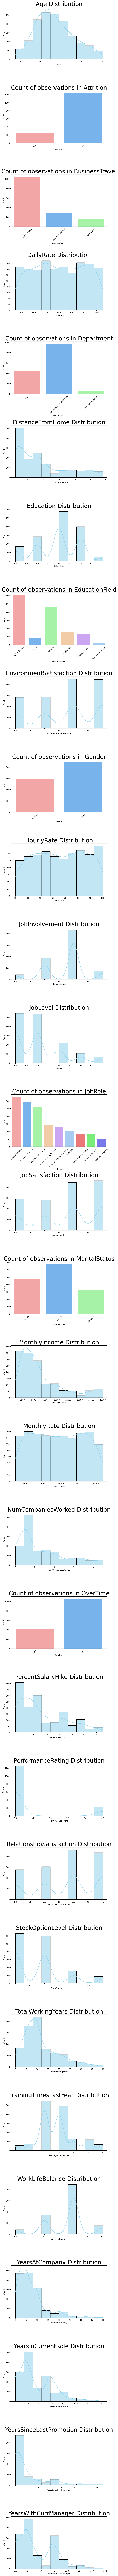

In [14]:
# Define custom color palette for each categorical column
custom_palettes = {
    'Attrition': ['#ff9999', '#66b3ff'],  # Add colors for 'Yes' and 'No'
    'BusinessTravel': ['#ff9999', '#66b3ff', '#99ff99'],  # Add colors for different travel types
    'Department': ['#ff9999', '#66b3ff', '#99ff99'],  # Add colors for different departments
    'Gender': ['#ff9999', '#66b3ff'],  # Add colors for 'Female' and 'Male'
    'MaritalStatus': ['#ff9999', '#66b3ff', '#99ff99'],  # Add colors for different marital statuses
    'OverTime': ['#ff9999', '#66b3ff'],  # Add colors for 'Yes' and 'No'
    'EducationField': ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#cc99ff', '#99ccff'],  # Add colors for different education fields
    'JobRole': ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#cc99ff', '#99ccff', '#ff6666', '#66ff66', '#6666ff'],  # Add colors for different job roles
    'age_group': ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#cc99ff']  # Adjust colors for age_group
}

num_columns = len(df.columns)
fig, axes = plt.subplots(num_columns, 1, figsize=(8, 6 * num_columns))
fig.subplots_adjust(hspace=0.5)

# Create a loop to generate visualizations for all columns
for i, column in enumerate(df.columns):
    plt.sca(axes[i])
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        sns.histplot(df[column], bins=10, kde=True, color='skyblue')  # Assign a default color for numeric columns
        plt.title(f'{column} Distribution', fontsize=30)
    else:
        if column in custom_palettes:
            sns.countplot(x=column, data=df, palette=custom_palettes[column])
        else:
            sns.countplot(x=column, data=df)  # Use default palette for other categorical columns

        plt.title(f'Count of observations in {column}', fontsize=30)
        plt.xlabel(column)
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


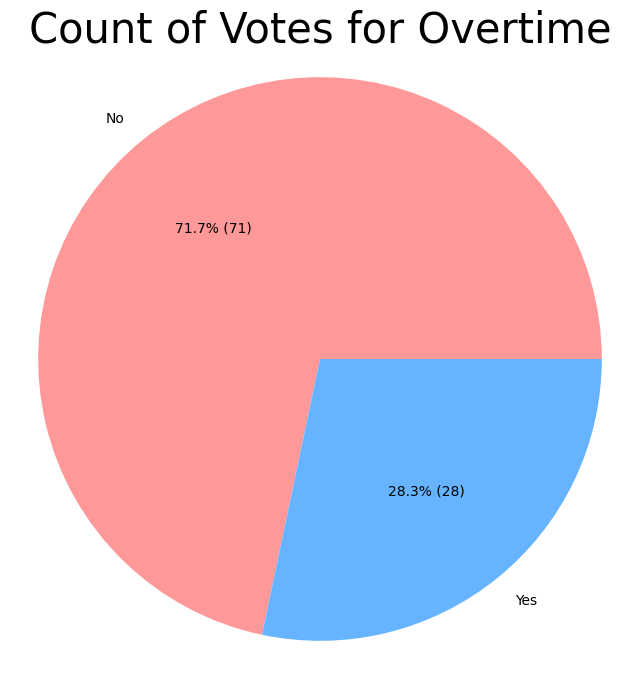

In [15]:
Overtime_Votes = df['OverTime'].value_counts()

# Define a custom color palette
custom_colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(8, 8))
plt.pie(Overtime_Votes, labels=Overtime_Votes.index, autopct=lambda p: f'{p:.1f}% ({int(p)})', colors=custom_colors)
plt.title('Count of Votes for Overtime', fontsize=30)
plt.axis('equal')
plt.show()


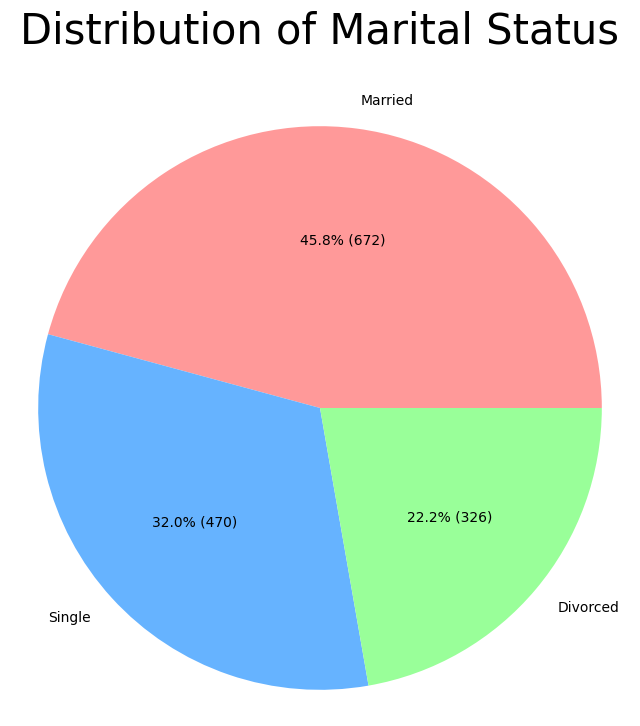

In [16]:
marital_status_counts = df['MaritalStatus'].value_counts()
custom_colors = ['#ff9999', '#66b3ff', '#99ff99']

plt.figure(figsize=(8, 8))
plt.pie(marital_status_counts, labels=marital_status_counts.index,
        autopct=lambda p: f'{p:.1f}% ({int(p*sum(marital_status_counts)/100)})',
        colors=custom_colors)
plt.title('Distribution of Marital Status\n', fontsize=30)
plt.axis('equal')
plt.show()



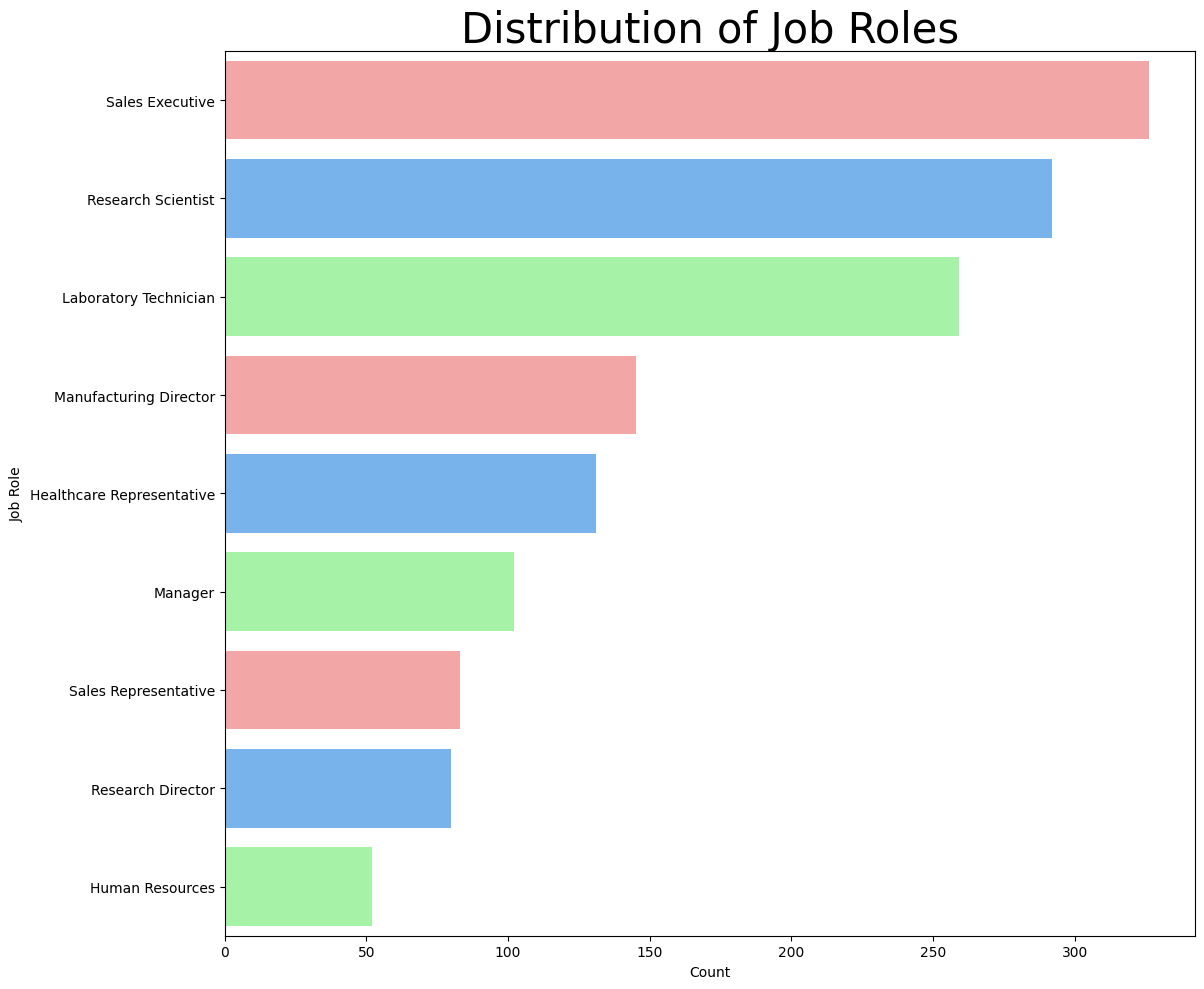

In [18]:
plt.figure(figsize=(22, 10))
plt.subplot(1, 2, 2)
sns.countplot(y='JobRole', data=df, order=df['JobRole'].value_counts().index, palette=custom_colors)
plt.title('Distribution of Job Roles', fontsize=30)
plt.xlabel('Count')
plt.ylabel('Job Role')

plt.tight_layout()
plt.show()


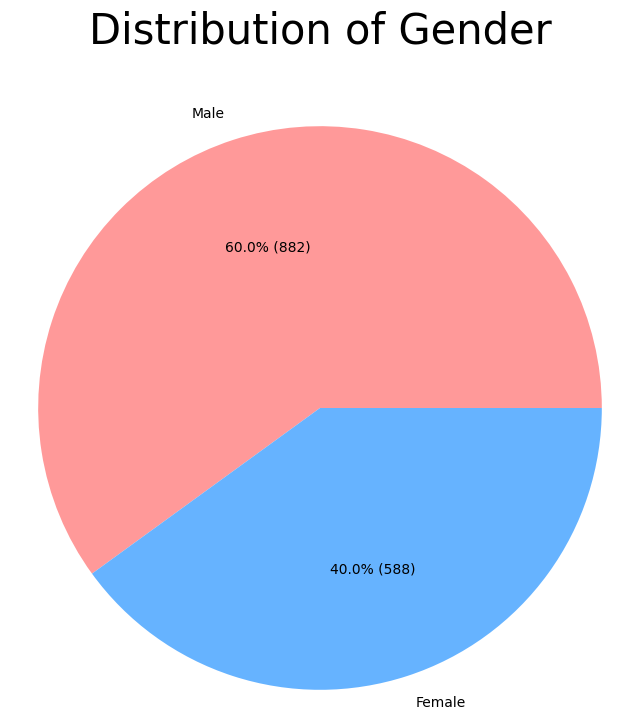

In [20]:
Gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 8))
custom_gender_colors = ['#ff9999', '#66b3ff']
plt.pie(Gender_counts, labels=Gender_counts.index, autopct=lambda p: f'{p:.1f}% ({int(p*sum(Gender_counts)/100)})', colors=custom_gender_colors)
plt.title('Distribution of Gender\n', fontsize=30)
plt.axis('equal')
plt.show()

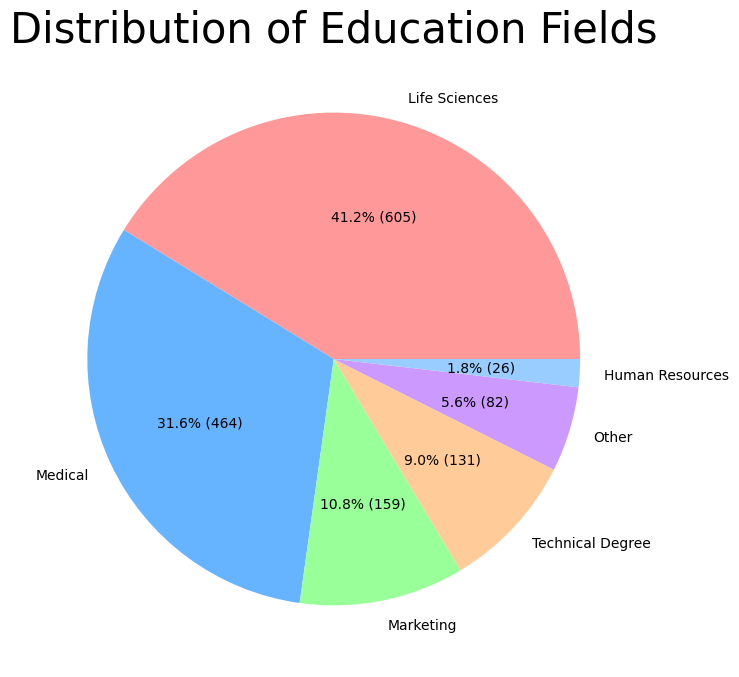

In [21]:
education_field_counts = df['EducationField'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(education_field_counts, labels=education_field_counts.index,
        autopct=lambda p: f'{p:.1f}% ({int(p*sum(education_field_counts)/100)})',
        colors=custom_palettes['EducationField'])  # Using the custom palette for EducationField
plt.title('Distribution of Education Fields', fontsize=30)
plt.show()

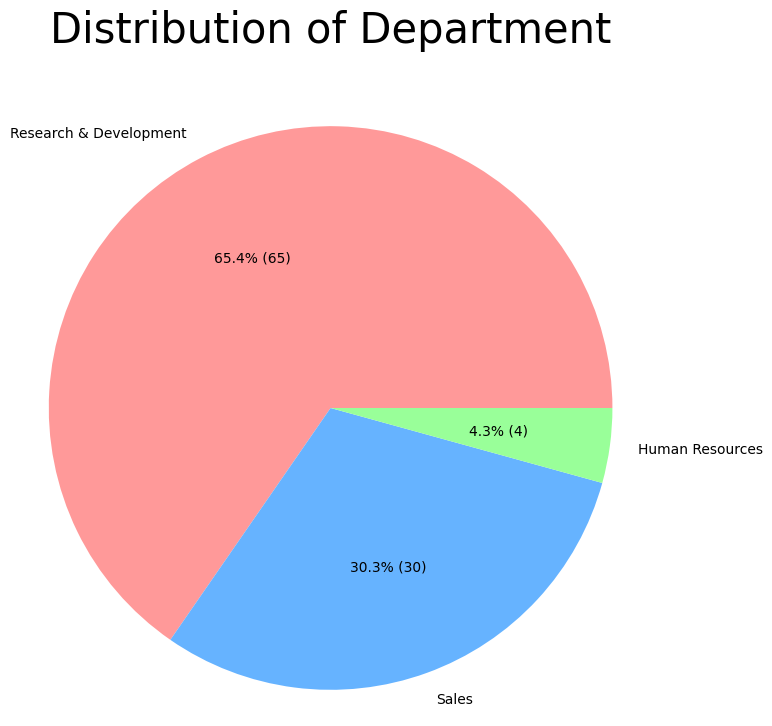

In [22]:
Department_counts = df['Department'].value_counts()
department_colors = custom_palettes['Department'] if 'Department' in custom_palettes else None

plt.figure(figsize=(8, 8))
plt.pie(Department_counts, labels=Department_counts.index, autopct=lambda p: f'{p:.1f}% ({int(p)})', colors=department_colors)
plt.title('Distribution of Department\n', fontsize=30)
plt.axis('equal')
plt.show()


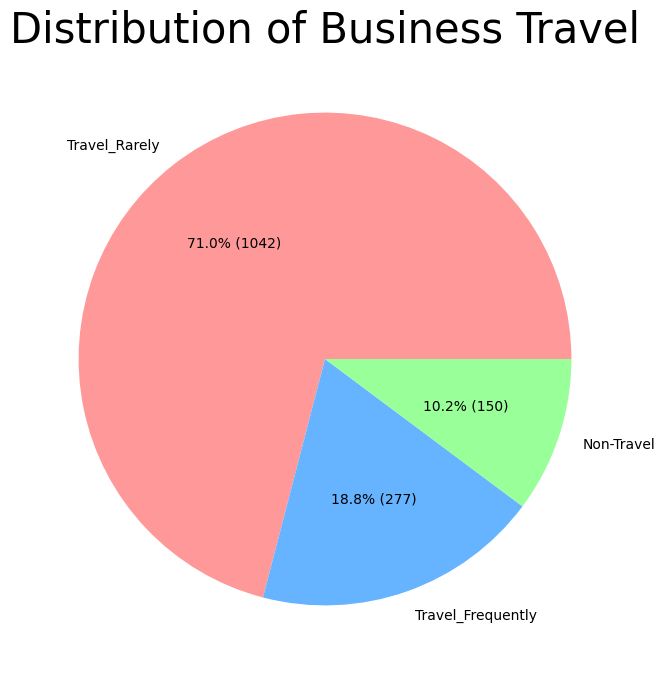

In [23]:
custom_palette = ['#ff9999', '#66b3ff', '#99ff99']  # Add your desired colors here

plt.figure(figsize=(8 , 8))
business_travel_counts = df['BusinessTravel'].value_counts()


plt.pie(business_travel_counts, labels=business_travel_counts.index,
        autopct=lambda p: f'{p:.1f}% ({int(p * sum(business_travel_counts)/100)})',
        colors=custom_palette)  # Use your custom palette here
plt.title('Distribution of Business Travel', fontsize=30)
plt.show()



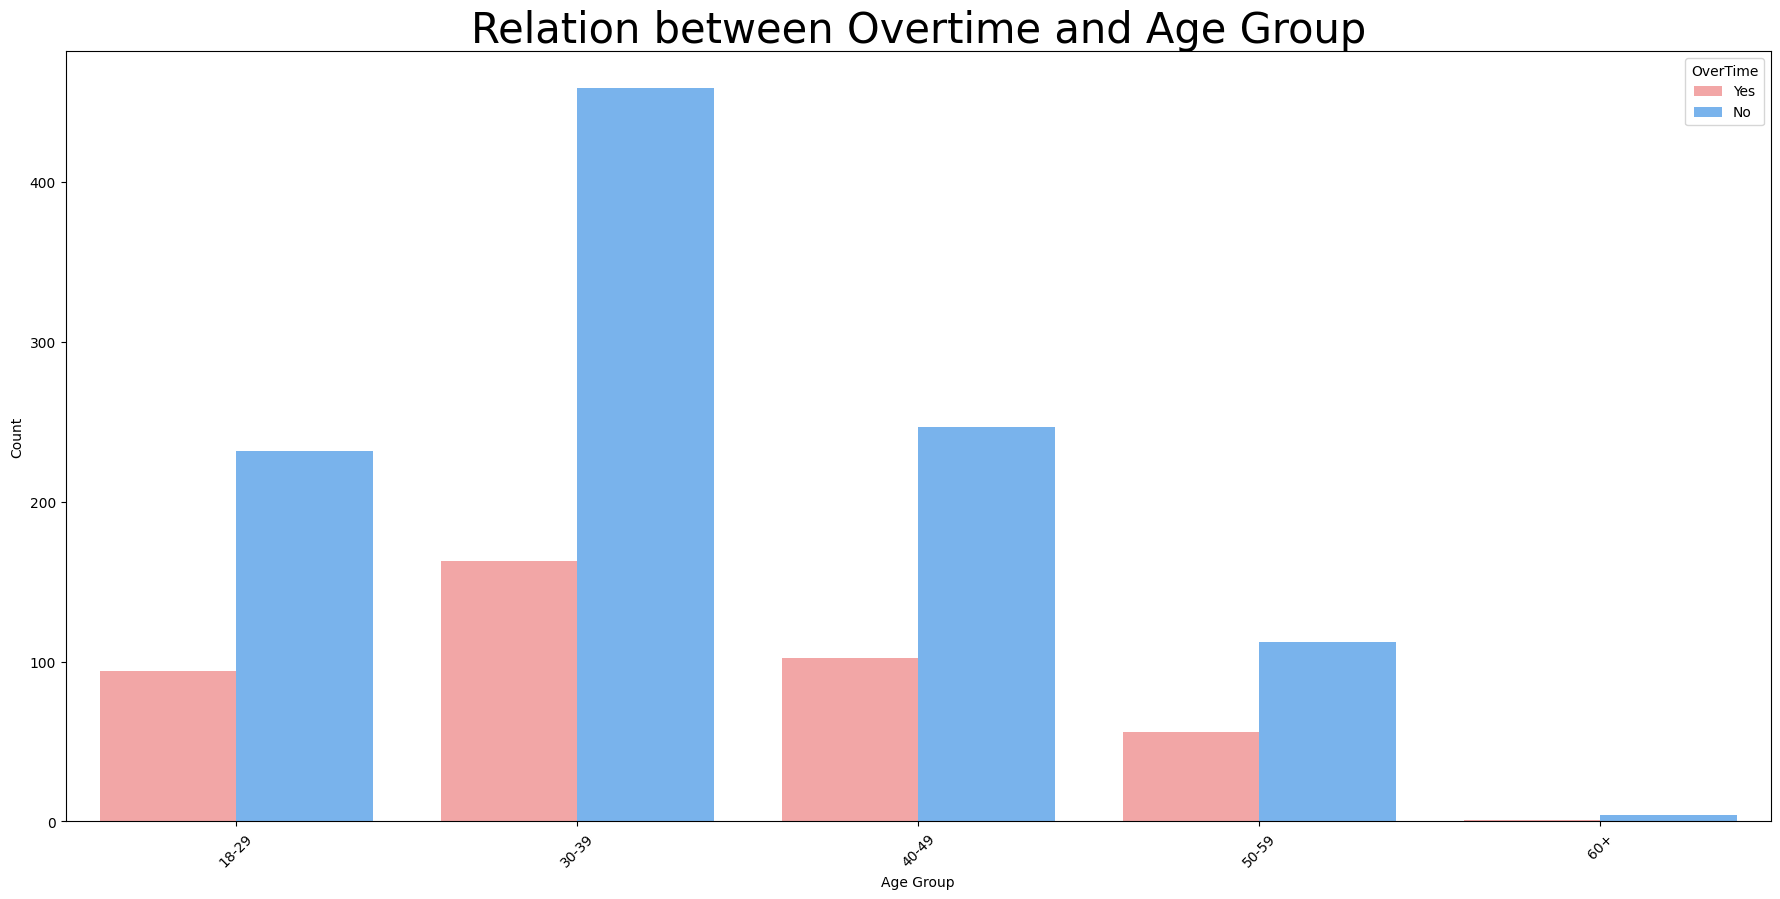

In [24]:
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']

df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(22, 10))
sns.countplot(x='age_group', hue='OverTime', data=df, palette=custom_palettes['OverTime'])  # Use the same palette as defined earlier
plt.title('Relation between Overtime and Age Group', fontsize=30)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#RELATION BETWEEN EDUCATION AND ATTRITION

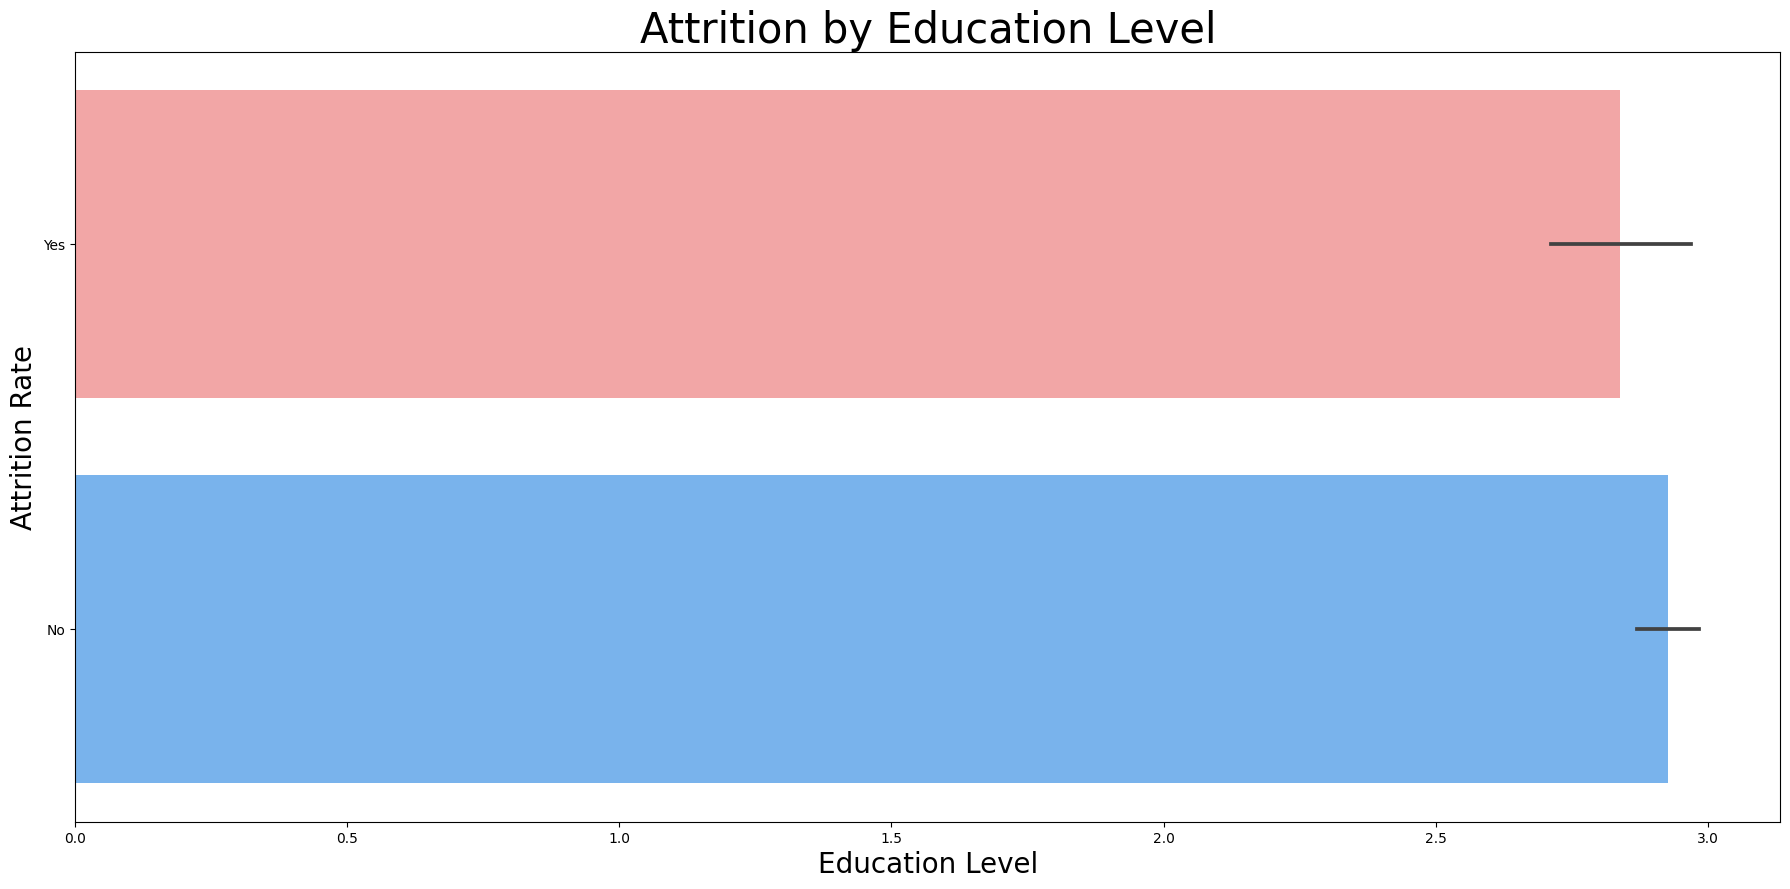

In [25]:
plt.figure(figsize=(22, 10))
sns.barplot(x='Education', y='Attrition', data=df, palette=custom_palettes['Attrition'])
plt.title('Attrition by Education Level', fontsize=30)
plt.xlabel('Education Level', fontsize=20)
plt.ylabel('Attrition Rate', fontsize=20)
plt.show()


#RELARION BETWEEN DEPARTMENT AND MONTHLY_INCOME

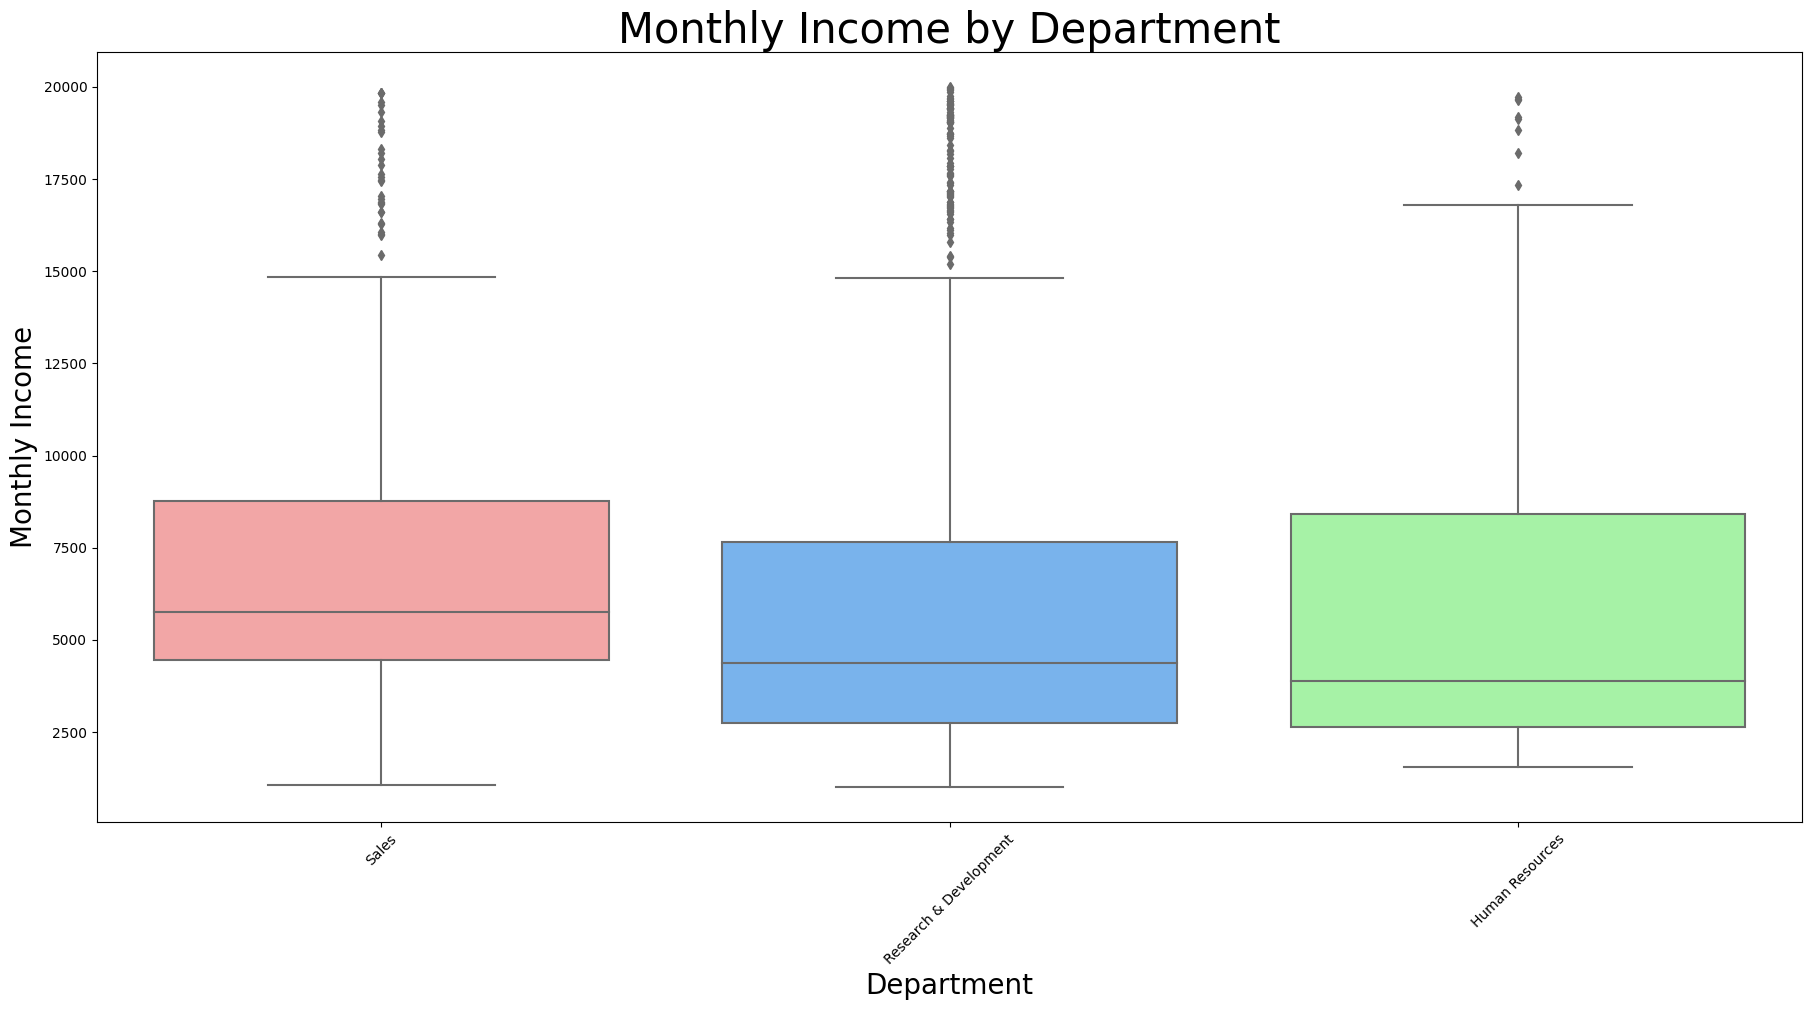

In [26]:
plt.figure(figsize=(22, 10))
sns.boxplot(x='Department', y='MonthlyIncome', data=df, palette=custom_palettes['Department'])
plt.title('Monthly Income by Department', fontsize=30)
plt.xlabel('Department', fontsize=20)  # Change 12 to your desired font size
plt.ylabel('Monthly Income', fontsize=20)  # Change 12 to your desired font size
plt.xticks(rotation=45)
plt.show()



#RELATION BETWEEN EMPLOYEE ATTRITION AND AGE

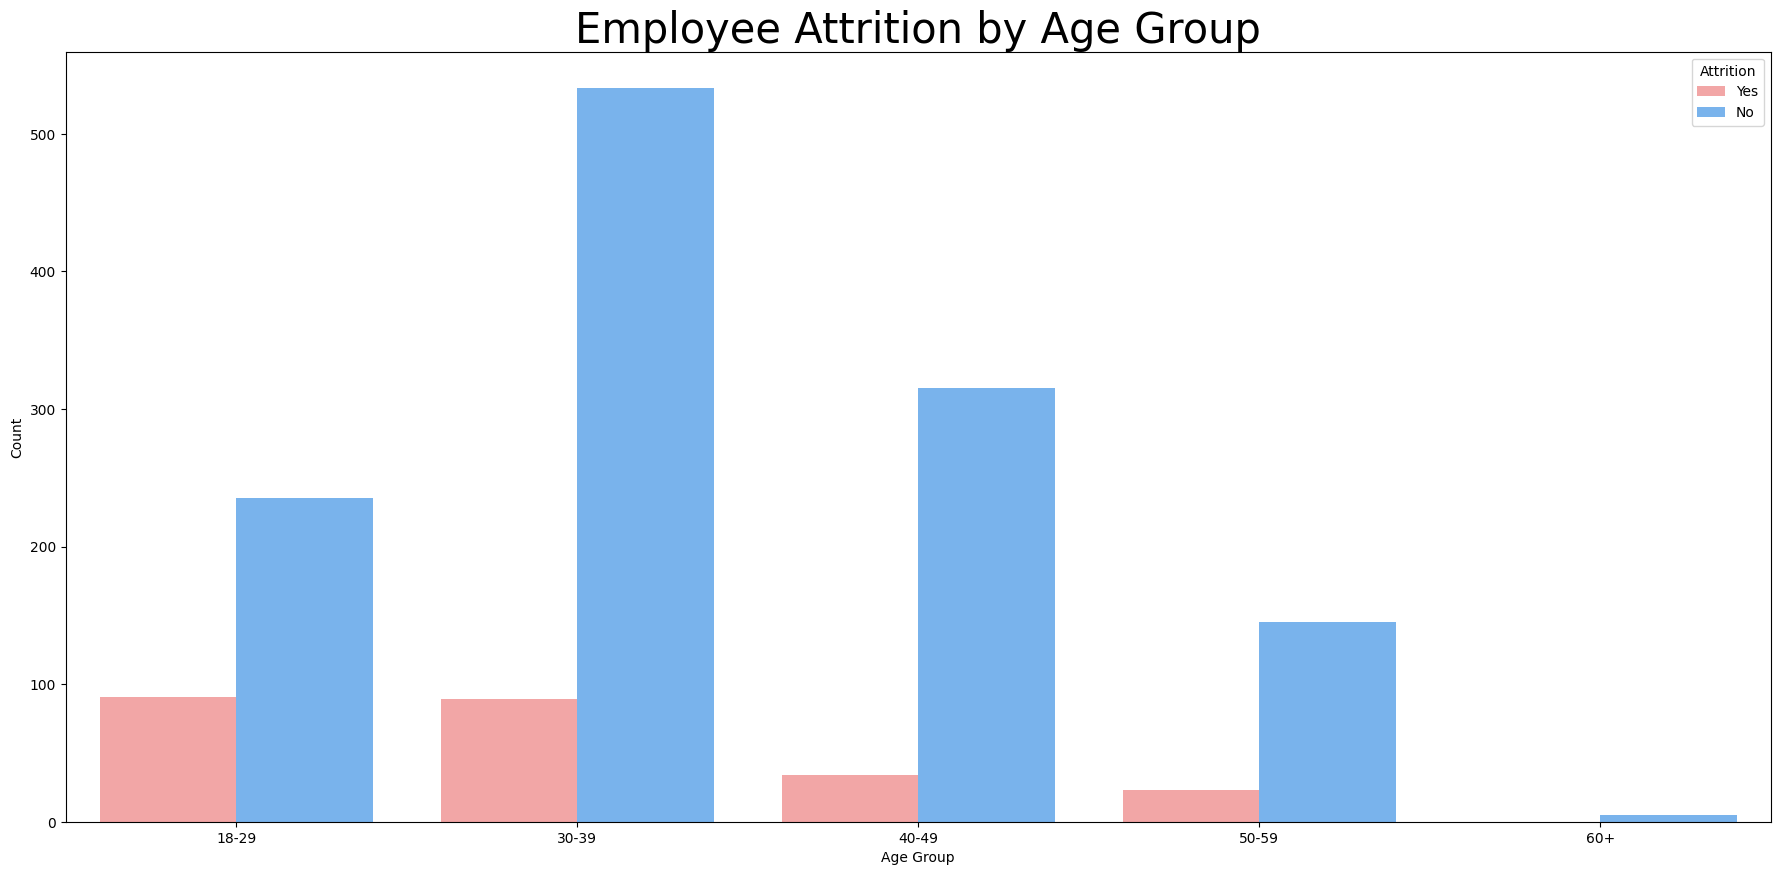

In [28]:
plt.figure(figsize=(22, 10))
sns.countplot(x='age_group', hue='Attrition', data=df, palette=custom_palettes['Attrition'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Employee Attrition by Age Group', fontsize=30)
plt.show()

# *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** ***

>

